In [7]:
# MLT-3 (Multi-Level Transmit-3 levels)

import numpy as np
import matplotlib.pyplot as plt

In [8]:
# MLT-3 Encoding Function

def mlt3_encode(bits):
    encoded_signal = []
    current_level = 0
    current_level_index = 0
    levels = [0,1,0,-1] #Cycle Pattern

    for i in bits:
        if(i == '1'):
            #Go to next level in cycle
            current_level_index = (current_level_index + 1) % 4
            current_level = levels[current_level_index]
        encoded_signal.append(current_level)
    return encoded_signal

In [9]:
# MLT-3 Encoding Function
def mlt3_decode(encoded_signal):
    decoded_sequence = []
    current_level = 1

    for i in range(len(encoded_signal)):
        if i == 0:  # First bit
            decoded_sequence.append('0' if encoded_signal[i] == 0 else '1')
            current_level = encoded_signal[i]  # Set initial level
        else:
            if encoded_signal[i] != current_level:
                decoded_sequence.append('1')
            else:
                decoded_sequence.append('0')
            current_level = encoded_signal[i]  # Update current level
    return ''.join(decoded_sequence)

In [10]:
#Plotting function

def plot(bits, encoded_signal):
    time = []
    voltage = []

    for i, level in enumerate(encoded_signal):
        # Each bit is 1 time unit wide
        time.extend([i, i + 1])
        voltage.extend([level, level])

    plt.figure(figsize=(14, 6))
    plt.plot(time, voltage, label= 'MLT-3 Encoded Signal')
    plt.title('Pseudoternary Encoding')
    plt.xlabel('Time')
    plt.ylabel('Signal Level')
    plt.ylim(-1.5,1.5)
    plt.yticks([-1,0,1])
    plt.grid(True)
    plt.legend()

    # Bit annotations
    for i, bit in enumerate(bits):
        plt.text(i + 0.5, 1.3, bit, ha='center', va='center', fontsize=12, color='black')

    plt.show()

In [11]:
#Input
binary_sequence = '10100111001'

Encoded Signal:  [1, 1, 0, 0, 0, -1, 0, 1, 1, 1, 0]


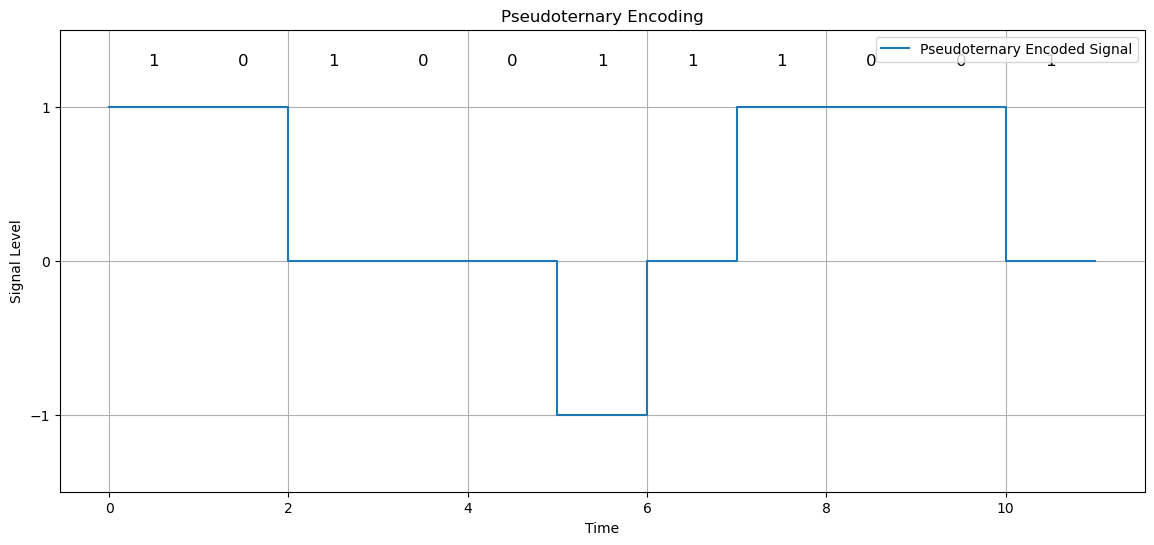

Decoded Sequence:  10100111001


In [12]:
#Plotting Encoded Signal and Decoding Sequence

encoded_signal = mlt3_encode(binary_sequence)
print("Encoded Signal: ", encoded_signal)

plot(binary_sequence, encoded_signal)

decoded_sequence = mlt3_decode(encoded_signal)
print("Decoded Sequence: ", decoded_sequence)